# Data integration profile - Level 1

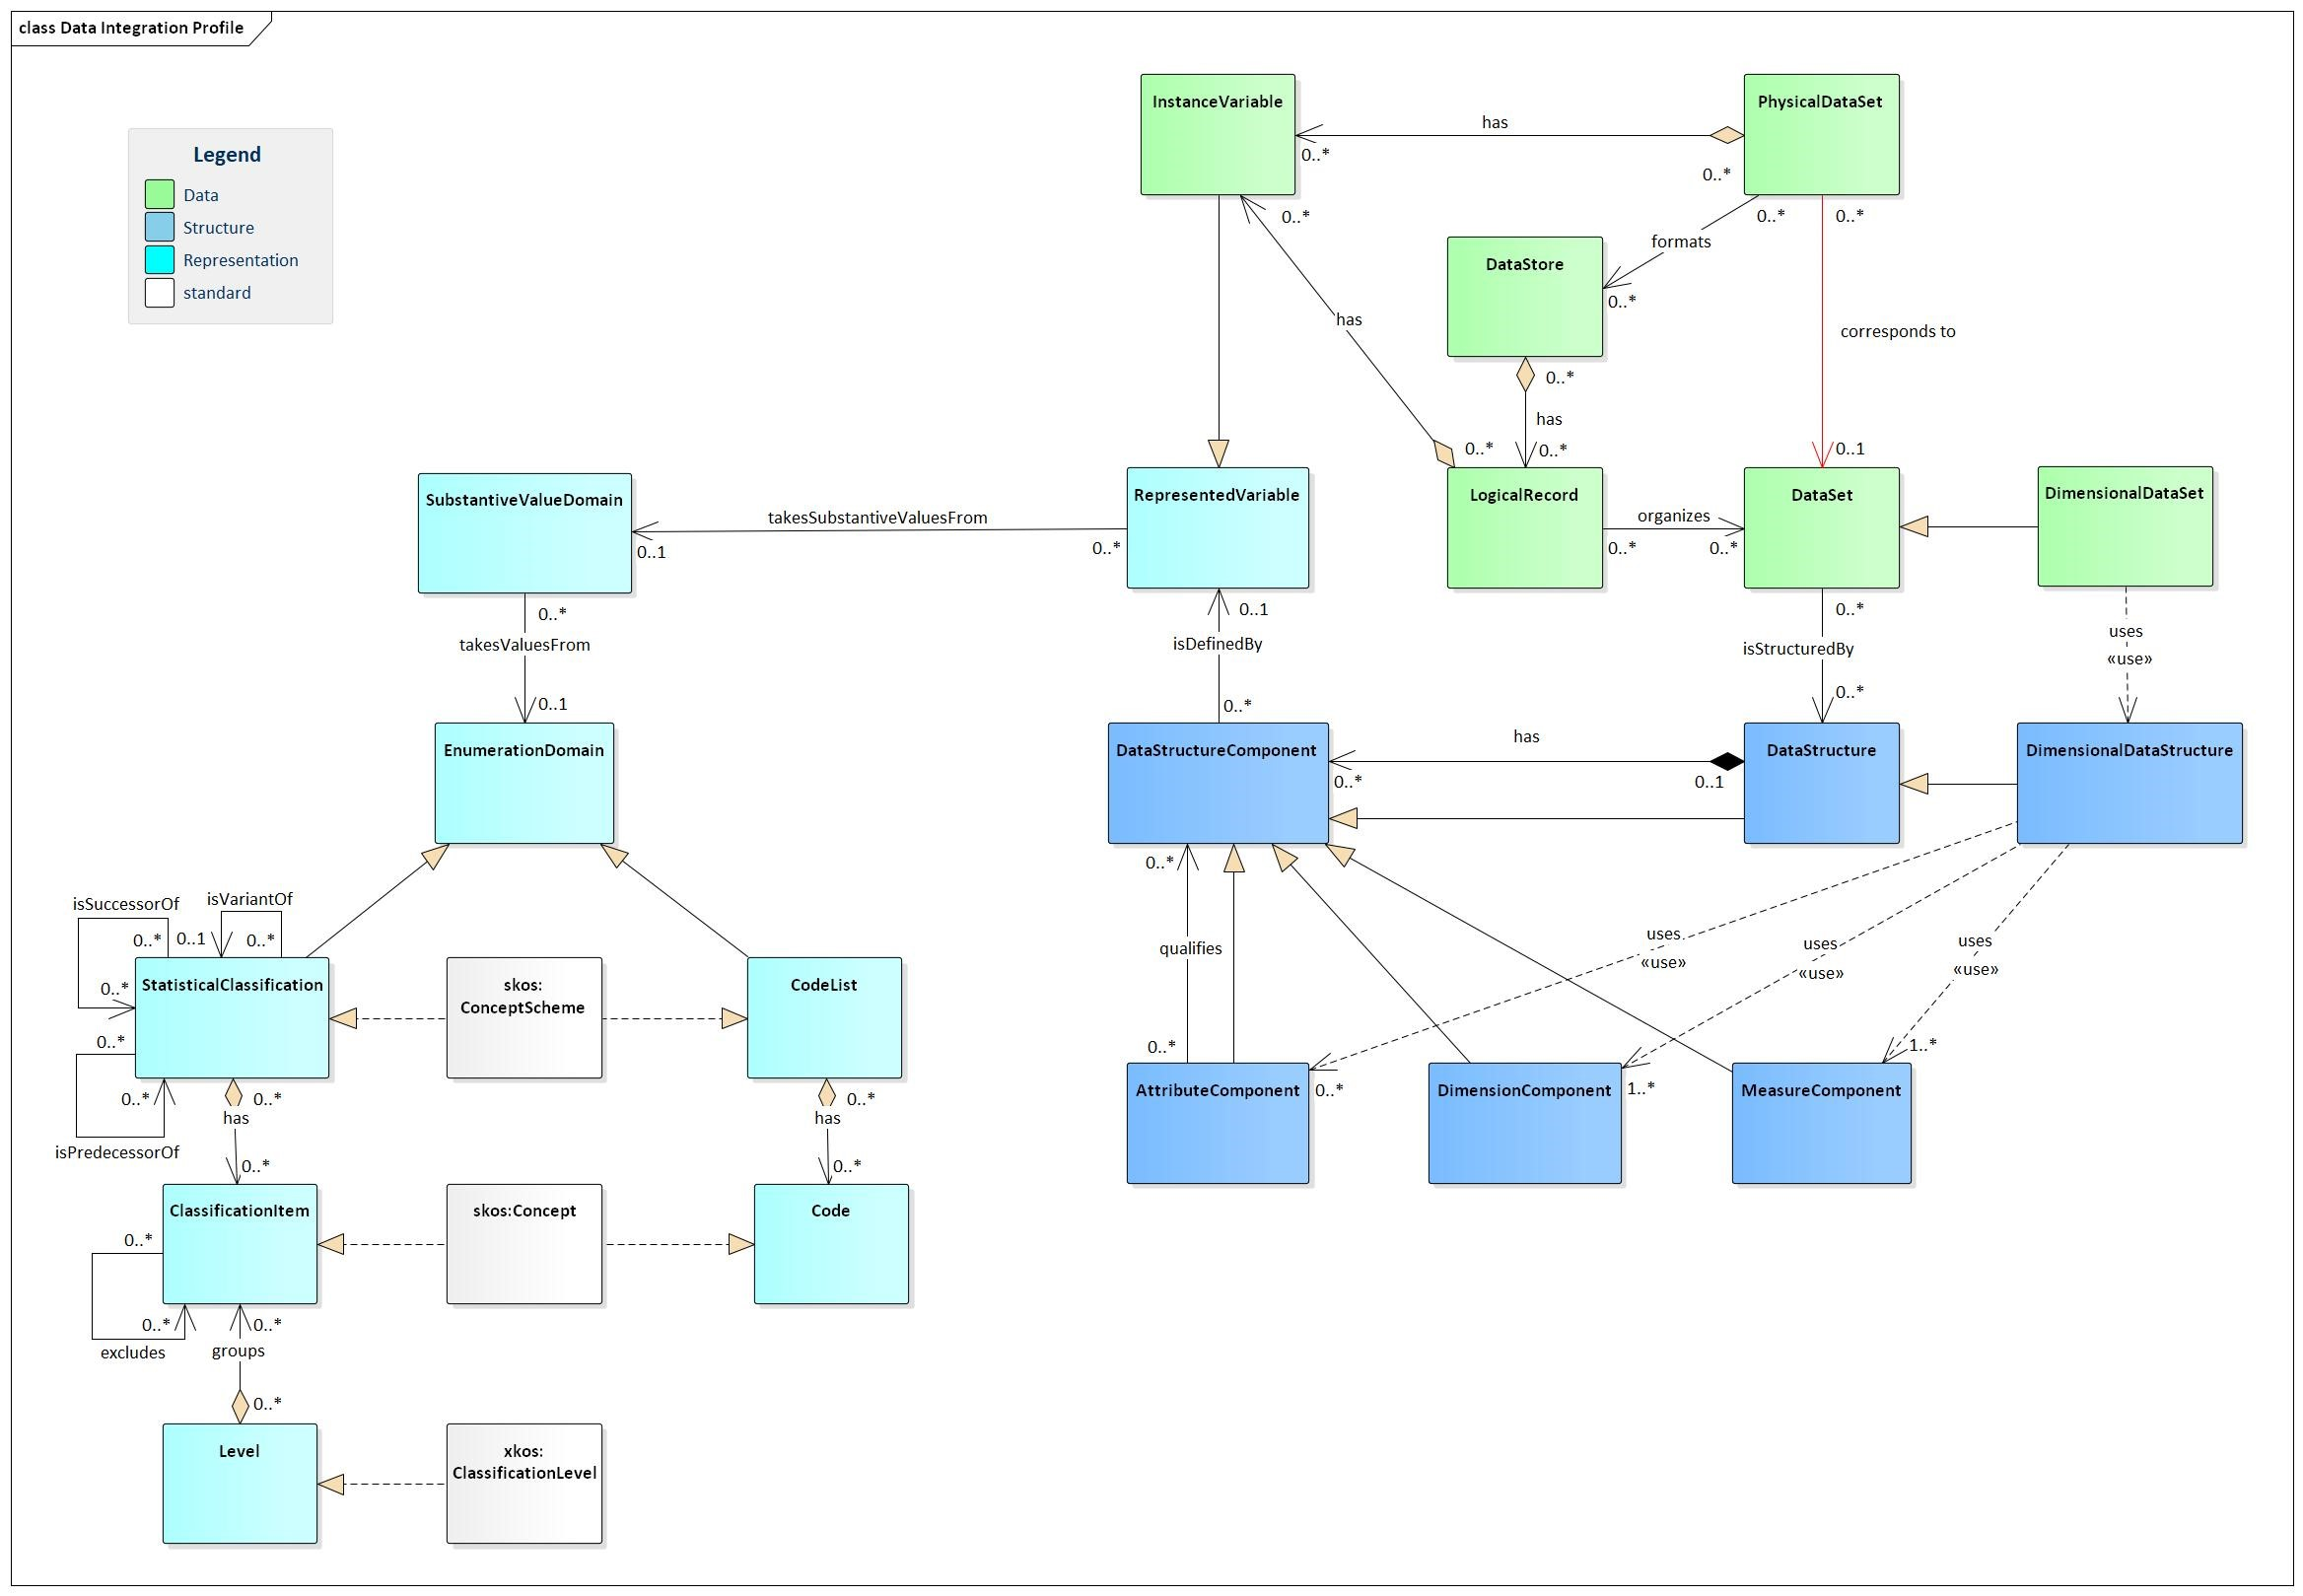

In [1]:
from IPython.display import Image
display(Image(filename='../assets/Data Integration Profile.jpg'))

In [2]:
# Import necessary libraries and modules
import rdflib
from rdflib import Graph, Namespace, URIRef, Literal, BNode
from urllib.parse import urlparse
from rdflib.namespace import NamespaceManager
from rdflib.namespace import RDF, RDFS, SKOS, XSD, OWL
import os

In [3]:
g = Graph()

In [4]:
g.parse('../ontology/ddi-cdi.onto.ttl', format='turtle')
g.parse('../ontology/DDICDILibrary.onto.ttl', format='turtle')
g.parse('../ontology/Agents.onto.ttl', format='turtle')
g.parse('../ontology/Classes.onto.ttl', format='turtle')
g.parse('../ontology/Components.onto.ttl', format='turtle')
g.parse('../ontology/Conceptual.onto.ttl', format='turtle')
g.parse('../ontology/DataDescription.onto.ttl', format='turtle')
g.parse('../ontology/DataTypes.onto.ttl', format='turtle')
g.parse('../ontology/Dimensional.onto.ttl', format='turtle')
g.parse('../ontology/Enumerations.onto.ttl', format='turtle')
g.parse('../ontology/FormatDescription.onto.ttl', format='turtle')
g.parse('../ontology/Process.onto.ttl', format='turtle')
g.parse('../ontology/Representations.onto.ttl', format='turtle')
g.parse('../ontology/StructuredDataTypes.onto.ttl', format='turtle')
g.parse('../ontology/Wide.onto.ttl', format='turtle')
g.parse('../ontology/KeyValue.onto.ttl', format='turtle')
g.parse('../ontology/Long.onto.ttl', format='turtle')


<Graph identifier=Nfea414e42d8d4f8993cb26dfb00c51f1 (<class 'rdflib.graph.Graph'>)>

In [5]:
print(f"Graph has {len(g)} triples.")

Graph has 8186 triples.


In [6]:
for prefix, namespace in g.namespaces():
    print(prefix, namespace)

brick https://brickschema.org/schema/Brick#
csvw http://www.w3.org/ns/csvw#
dc http://purl.org/dc/elements/1.1/
dcat http://www.w3.org/ns/dcat#
dcmitype http://purl.org/dc/dcmitype/
dcterms http://purl.org/dc/terms/
dcam http://purl.org/dc/dcam/
doap http://usefulinc.com/ns/doap#
foaf http://xmlns.com/foaf/0.1/
geo http://www.opengis.net/ont/geosparql#
odrl http://www.w3.org/ns/odrl/2/
org http://www.w3.org/ns/org#
prof http://www.w3.org/ns/dx/prof/
prov http://www.w3.org/ns/prov#
qb http://purl.org/linked-data/cube#
schema https://schema.org/
sh http://www.w3.org/ns/shacl#
skos http://www.w3.org/2004/02/skos/core#
sosa http://www.w3.org/ns/sosa/
ssn http://www.w3.org/ns/ssn/
time http://www.w3.org/2006/time#
vann http://purl.org/vocab/vann/
void http://rdfs.org/ns/void#
wgs https://www.w3.org/2003/01/geo/wgs84_pos#
owl http://www.w3.org/2002/07/owl#
rdf http://www.w3.org/1999/02/22-rdf-syntax-ns#
rdfs http://www.w3.org/2000/01/rdf-schema#
xsd http://www.w3.org/2001/XMLSchema#
xml http

In [7]:
# Selected classes in the profile:
cdi = Namespace("http://ddialliance.org/Specification/DDI-CDI/1.0/RDF/")

selected_classes = [
    cdi.DataStructureComponent,
    cdi.DataStructure,
    cdi.DimensionalDataStructure,
    cdi.AttributeComponent,
    cdi.DimensionComponent,
    cdi.MeasureComponent,
    cdi.RepresentedVariable,
    cdi.SubstantiveValueDomain,
    cdi.EnumerationDomain,
    cdi.DimensionalDataSet,
    cdi.DataSet,
    cdi.InstanceVariable,
    cdi.SpecializationRole,
    cdi.GeoRole,
    cdi.TimeRole,
    cdi['DimensionalDataSet-name'],
    cdi.ObjectName
    ]

In [8]:
# Initialize a new graph for the profile
profile_graph = Graph()
profile_graph.bind("cdi", cdi)

In [9]:
# Add classes and their properties
for cls in selected_classes:
    # Add class definition
    profile_graph.add((cls, RDF.type, RDFS.Class))
    # Capture rdfs:label, rdfs:comment, and rdfs:subClassOf for each class
    for predicate in [RDFS.label, RDFS.comment, RDFS.subClassOf]:
        for obj in g.objects(cls, predicate):
            if predicate != RDFS.subClassOf or (predicate == RDFS.subClassOf and obj in selected_classes):
                profile_graph.add((cls, predicate, obj))

In [10]:
# Identify and add relevant properties based on rdfs:domain
for prop in g.subjects(RDF.type, RDF.Property):
    domains = set(g.objects(prop, RDFS.domain))
    # Check if any of the domains of this property match the selected classes
    if domains.intersection(selected_classes):
        # Add the property to the profile graph
        profile_graph.add((prop, RDF.type, RDF.Property))
        # Add domain and range information
        for domain in g.objects(prop, RDFS.domain):
            profile_graph.add((prop, RDFS.domain, domain))
        for range in g.objects(prop, RDFS.range):
            profile_graph.add((prop, RDFS.range, range))
        # Add labels for the property
        for label in g.objects(prop, RDFS.label):
            profile_graph.add((prop, RDFS.label, label))
        for altLabel in g.objects(prop, SKOS.altLabel):
            profile_graph.add((prop, SKOS.altLabel, altLabel))

In [11]:
# Save the profile to a TTL file
profile_graph.serialize("../data/output/cdi_profile1.ttl", format="turtle")

<Graph identifier=Nd66d26186bec40e189693c0396e323be (<class 'rdflib.graph.Graph'>)>